## Section 1.6 Analysis of Business Cashflows Trends using a Bank Statement
## 27 January 2022

In [ ]:
#Data analysis steps (Source:Simplilearn PG AI - Data Science with Python program)

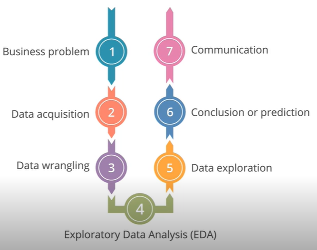

#### Step 1: Organize your business problem

In [29]:
"""
Business problem is to identify days with spikes or low business with the help of the bank statements
data which indicates business balance patterns
"""

##### Step 2: Data aquisition

In [75]:
#Obtain bank statement data
#Mine was extracted from business internet banking and placed in a local drive
path = "C:\\20220127_BankStatement.xlsx"

#import libraries for data extraction
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

#extract data from file to jupyter notebook or any other python editor
df = pd.read_excel(path)
df.head()

,DATE,CR,DR,BALANCE
0,2021-07-02,0.0,500000.0,2944585.825
1,2021-07-04,0.0,1003000.0,1941585.825
2,2021-07-04,0.0,1003000.0,938585.825
3,2021-07-05,0.0,356250.0,582335.825
4,2021-07-05,1443750.0,0.0,2026085.825


##### Step 3: Data wrangling - cleansing and manipulation

In [34]:
#view info about data  columns, datatype, whether it has null values that should be cleaned or treated by replacing 
#mean or median
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0    DATE     253 non-null    datetime64[ns]
 1    CR       253 non-null    float64       
 2    DR       253 non-null    float64       
 3    BALANCE  253 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 8.0 KB


In [35]:
#check if columns names have spaces
list(df.columns)
#columns names have leading spaces that should be cleaned ['\xa0DATE', '\xa0CR', '\xa0DR', '\xa0BALANCE']



['\xa0DATE', '\xa0CR', '\xa0DR', '\xa0BALANCE']

In [76]:
#clean spaces before column names by replacing with names without spaces
df = df.rename(columns = {'\xa0DATE':'DATE','\xa0CR':'CR', '\xa0DR':'DR','\xa0BALANCE':'BALANCE'}, inplace=False)

In [77]:
#check again if leading spaces no longer exist in column names
list(df.columns)


['DATE', 'CR', 'DR', 'BALANCE']

In [78]:
df.head()

,DATE,CR,DR,BALANCE
0,2021-07-02,0.0,500000.0,2944585.825
1,2021-07-04,0.0,1003000.0,1941585.825
2,2021-07-04,0.0,1003000.0,938585.825
3,2021-07-05,0.0,356250.0,582335.825
4,2021-07-05,1443750.0,0.0,2026085.825


In [38]:
#view data with date above 2nd September
mask = (df['DATE']>='2021-09-02')
df[mask]

,DATE,CR,DR,BALANCE
67,2021-09-02,0.0,625000.0,5.940982e+06
68,2021-09-02,0.0,3000000.0,2.940982e+06
69,2021-09-02,0.0,87500.0,2.853482e+06
70,2021-09-02,0.0,1125000.0,1.728482e+06
71,2021-09-02,102011880.0,0.0,1.037404e+08
...,...,...,...,...
248,2022-01-21,0.0,75000.0,9.888458e+06
249,2022-01-22,0.0,2015000.0,7.873458e+06
250,2022-01-24,0.0,3990000.0,3.883458e+06
251,2022-01-26,4000000.0,0.0,7.883458e+06


#### Step 4: Perform Exploratory Data Analysis

In [80]:
#Use mathematical or graphical output to aid data analysis

#See how data is distributed
df.describe()

,CR,DR,BALANCE
count,2.530000e+02,2.530000e+02,2.530000e+02
mean,1.277093e+06,1.263501e+06,1.562762e+07
std,6.864773e+06,3.607959e+06,1.849404e+07
min,0.000000e+00,0.000000e+00,3.474375e+03
25%,0.000000e+00,3.750000e+04,3.617170e+06
50%,0.000000e+00,4.250000e+05,9.367931e+06
75%,0.000000e+00,1.250000e+06,2.288687e+07
max,1.020119e+08,4.500000e+07,1.037404e+08


#### Step 5: Data Exploration

In [97]:
#learn data patterns

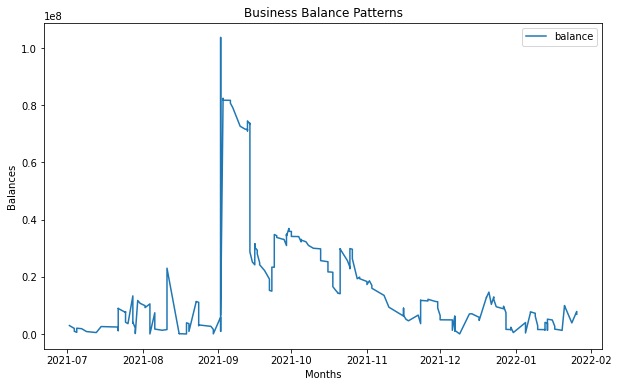

In [96]:
#Distribution of balances across months
df.head()
plt.plot(df['DATE'], df['BALANCE'], label='balance')
plt.title('Business Balance Patterns')
plt.xlabel('Months')
plt.ylabel('Balances')
plt.legend()
plt.show()


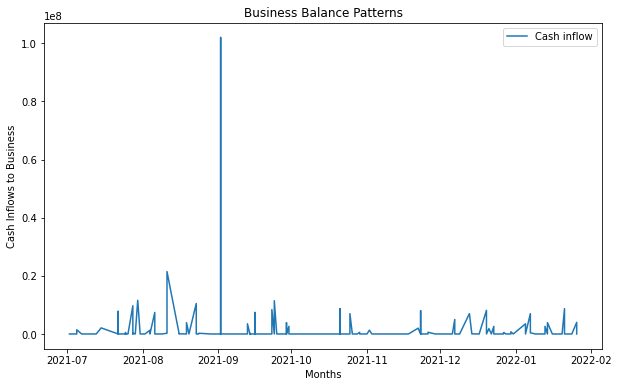

In [95]:
#Distribution of cash inflows across months
df.head()
plt.plot(df['DATE'], df['CR'], label='Cash inflow')
plt.title('Business Balance Patterns')
plt.xlabel('Months')
plt.ylabel('Cash Inflows to Business')
plt.legend()
plt.show()

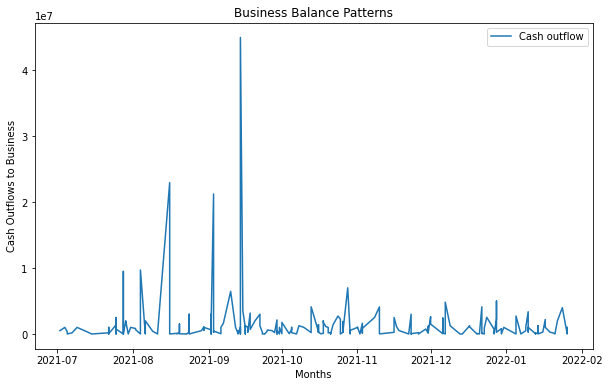

In [93]:
#Distribution of cash outflows across months
df.head()
plt.plot(df['DATE'], df['DR'], label='Cash outflow')
plt.title('Business Balance Patterns')
plt.xlabel('Months')
plt.ylabel('Cash Outflows to Business')
plt.legend()
plt.show()

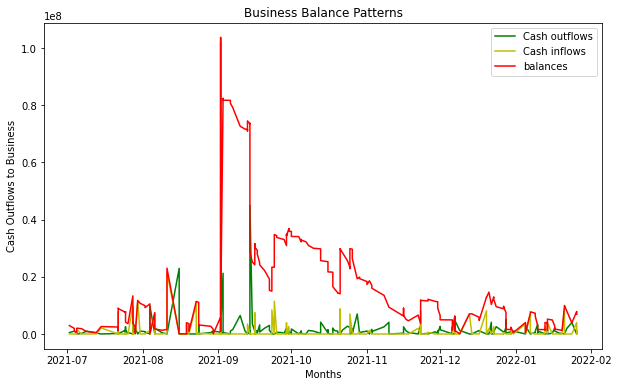

In [92]:
#Distribution of cash inflows, outflows, balances across months
df.head()
plt.plot(df['DATE'], df['DR'],'g' ,label = 'Cash outflows')
plt.plot(df['DATE'], df['CR'], 'y', label = 'Cash inflows')
plt.plot(df['DATE'], df['BALANCE'],'r', label = 'balances')
plt.title('Business Balance Patterns')
plt.xlabel('Months')
plt.ylabel('Cash Outflows to Business')
plt.legend()
plt.show()

In [39]:
#view data with date betwen  2nd September and 24th december
mask = (df['DATE']>='2021-09-02') & (df['DATE']<='2021-12-24')
df[mask]

,DATE,CR,DR,BALANCE
67,2021-09-02,0.0,625000.0,5.940982e+06
68,2021-09-02,0.0,3000000.0,2.940982e+06
69,2021-09-02,0.0,87500.0,2.853482e+06
70,2021-09-02,0.0,1125000.0,1.728482e+06
71,2021-09-02,102011880.0,0.0,1.037404e+08
...,...,...,...,...
207,2021-12-22,0.0,70000.0,1.045846e+07
208,2021-12-22,0.0,105000.0,1.035346e+07
209,2021-12-23,2625000.0,0.0,1.297846e+07
210,2021-12-23,0.0,910000.0,1.206846e+07


In [40]:
#view date and balances  with date betwen  2nd September and 24th december
#mask = (df['DATE']>='2021-09-02') & (df['DATE']<='2021-12-24')
df[mask][['DATE','BALANCE']]

,DATE,BALANCE
67,2021-09-02,5.940982e+06
68,2021-09-02,2.940982e+06
69,2021-09-02,2.853482e+06
70,2021-09-02,1.728482e+06
71,2021-09-02,1.037404e+08
...,...,...
207,2021-12-22,1.045846e+07
208,2021-12-22,1.035346e+07
209,2021-12-23,1.297846e+07
210,2021-12-23,1.206846e+07


In [41]:
df.head()

,DATE,CR,DR,BALANCE
0,2021-07-02,0.0,500000.0,2944585.825
1,2021-07-04,0.0,1003000.0,1941585.825
2,2021-07-04,0.0,1003000.0,938585.825
3,2021-07-05,0.0,356250.0,582335.825
4,2021-07-05,1443750.0,0.0,2026085.825


In [ ]:
"""
Analysis:
========
Aim is to see the patterns of cash outflows and cash inflows along days of months, 
comparing Nov 21, Dec 21, and Jan 21
"""


In [45]:
#extact day, month and year from date
date = df['DATE']
df['DAY'] = date.dt.day
df['MONTH'] = date.dt.month
df['YEAR'] = date.dt.year
df.head()

,DATE,CR,DR,BALANCE,DAY,MONTH,YEAR
0,2021-07-02,0.0,500000.0,2944585.825,2,7,2021
1,2021-07-04,0.0,1003000.0,1941585.825,4,7,2021
2,2021-07-04,0.0,1003000.0,938585.825,4,7,2021
3,2021-07-05,0.0,356250.0,582335.825,5,7,2021
4,2021-07-05,1443750.0,0.0,2026085.825,5,7,2021


In [50]:
#filter data 
#Nov 21
mask = ((df['MONTH']==11) & (df['YEAR']==2021))
dfNov21 = df[mask]
dfNov21

#Dec 21
mask = ((df['MONTH']==12) & (df['YEAR']==2021))
dfDec21 = df[mask]
dfDec21

#Jan 22
mask = ((df['MONTH']==1) & (df['YEAR']==2022))
dfJan22 = df[mask]
dfJan22.head(1)

,DATE,CR,DR,BALANCE,DAY,MONTH,YEAR
223,2022-01-05,3500000.0,0.0,3993257.025,5,1,2022


In [51]:
mask

0      False
1      False
2      False
3      False
4      False
       ...  
248     True
249     True
250     True
251     True
252     True
Length: 253, dtype: bool

In [ ]:
#import matplotlib.pyplot as plt
"""
plt.plot(xAxis, yAxis)
plt.title('Title')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()
"""

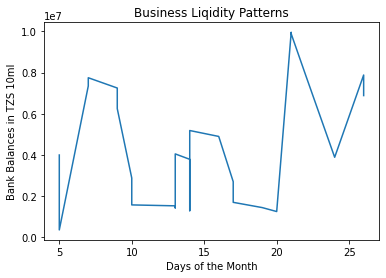

In [58]:
#view only one month
plt.plot(dfJan22['DAY'], dfJan22['BALANCE'])
plt.title('Business Liqidity Patterns')
plt.xlabel('Days of the Month')
plt.ylabel('Bank Balances in TZS 10ml')
plt.show()

In [52]:
dfJan22.head()

,DATE,CR,DR,BALANCE,DAY,MONTH,YEAR
223,2022-01-05,3500000.0,0.0,3993257.025,5,1,2022
224,2022-01-05,0.0,362500.0,3630757.025,5,1,2022
225,2022-01-05,0.0,250000.0,3380757.025,5,1,2022
226,2022-01-05,0.0,305000.0,3075757.025,5,1,2022
227,2022-01-05,0.0,2725000.0,350757.025,5,1,2022


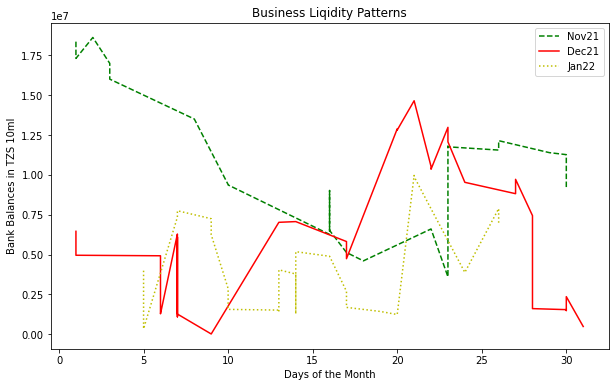

In [72]:
#view more than one month (Nov 21 to Jan 22)
plt.plot(dfNov21['DAY'], dfNov21['BALANCE'], 'g' ,linestyle='dashed', label='Nov21')
plt.plot(dfDec21['DAY'], dfDec21['BALANCE'], 'r', label='Dec21')
plt.plot(dfJan22['DAY'], dfJan22['BALANCE'], 'y', linestyle='dotted',label='Jan22')
plt.title('Business Liqidity Patterns')
plt.xlabel('Days of the Month')
plt.ylabel('Bank Balances in TZS 10ml')
plt.rcParams['figure.figsize']=(10,6)
#plt.ylim([0,15000000])
plt.legend()
plt.show()

In [66]:
dfDec21.describe()

,CR,DR,BALANCE,DAY,MONTH,YEAR
count,3.700000e+01,3.700000e+01,3.700000e+01,37.000000,37.0,37.0
mean,8.458375e+05,1.078046e+06,6.218513e+06,17.540541,12.0,2021.0
std,2.041277e+06,1.397600e+06,4.147755e+06,9.705653,0.0,0.0
min,0.000000e+00,0.000000e+00,2.497095e+04,1.000000,12.0,2021.0
25%,0.000000e+00,0.000000e+00,1.869507e+06,7.000000,12.0,2021.0
50%,0.000000e+00,5.750000e+05,6.099971e+06,20.000000,12.0,2021.0
75%,4.500000e+04,1.500000e+06,9.532007e+06,27.000000,12.0,2021.0
max,8.138486e+06,5.000000e+06,1.464596e+07,31.000000,12.0,2021.0


#### Step 6: Conclusion or Prediction

In [ ]:
# Prediction involves generation of models for predictive analysis
# Draw conclusion 
"""
Business booms between 20th and 27th, and falls between 1st and 17th 
Owner's supervision efforts worth more between 20th to 27th  
Worker can take breaks or leave or maintenance can be scheduled  between 1st and 17th
"""

#### Step 7: Communicate Results

In [99]:
#If it is necessary to communicate your results, use text and graphs